In [1]:
import torch
from ptycho_torch import helper as hh
import matplotlib.pyplot as plt
from ptycho_torch.config_params import Config


In [10]:
test = torch.rand(4,1,16,16)
#Expand along 2nd dimension
test_expanded = test.expand(-1,4,-1,-1)
test_flatten = torch.flatten(test_expanded,0,1)

test_flatten.shape

torch.Size([16, 16, 16])

In [11]:
x = torch.arange(78)
y = torch.arange(78)

random = torch.rand(16,1,2)
random[:,:,0].shape

torch.Size([16, 1])

In [2]:
cfg = {'N': 16,
       'offset': 20,
       'gridsize': 2,
       'max_position_jitter': 10
    }

config = Config()
config.set_config(cfg)

Testing patch reassembly function from helper.py

In [3]:
#Create random 4D test tensor
test_tensor = torch.rand(2, 4, 16, 16, dtype = torch.cfloat)

#Create random 2d offset tensor
disp_1, disp_2 = 4, 9
test_offset = torch.tensor([[[[-disp_1,-disp_1]],[[-disp_1,disp_1]],[[disp_1,disp_1]],[[disp_1,-disp_1]]],
                            [[[-disp_2,-disp_2]],[[-disp_2,disp_2]],[[disp_2,disp_2]],[[disp_2,-disp_2]]]])
#Test reassemble_patches_position_real from hh
reassembled_tensor = hh.reassemble_patches_position_real(test_tensor, test_offset)



tensor([[ 0.0889,  0.1111,  0.1333,  0.1556,  0.1778,  0.2000,  0.2222,  0.2444,
          0.2667,  0.2889,  0.3111,  0.3333,  0.3556,  0.3778,  0.4000,  0.4222,
          0.4444,  0.4667,  0.4889,  0.5111,  0.5333,  0.5556,  0.5778,  0.6000,
          0.6222,  0.6444,  0.6667,  0.6889,  0.7111,  0.7333,  0.7556,  0.7778,
          0.8000,  0.8222,  0.8444,  0.8667,  0.8889,  0.9111,  0.9333,  0.9556,
          0.9778,  1.0000,  1.0222,  1.0444,  1.0667,  1.0889],
        [ 0.0889,  0.1111,  0.1333,  0.1556,  0.1778,  0.2000,  0.2222,  0.2444,
          0.2667,  0.2889,  0.3111,  0.3333,  0.3556,  0.3778,  0.4000,  0.4222,
          0.4444,  0.4667,  0.4889,  0.5111,  0.5333,  0.5556,  0.5778,  0.6000,
          0.6222,  0.6444,  0.6667,  0.6889,  0.7111,  0.7333,  0.7556,  0.7778,
          0.8000,  0.8222,  0.8444,  0.8667,  0.8889,  0.9111,  0.9333,  0.9556,
          0.9778,  1.0000,  1.0222,  1.0444,  1.0667,  1.0889],
        [-0.0889, -0.0667, -0.0444, -0.0222,  0.0000,  0.0222,

/root/miniconda3/envs/ptychopinn_ptychodus_pytorch/lib/python3.10/site-packages/torch/nn/functional.py:4343: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [4]:
reassembled_tensor[1,:21,:21] = 0
reassembled_tensor[1,25:,:21] = 0
reassembled_tensor[1,:21,25:] = 0

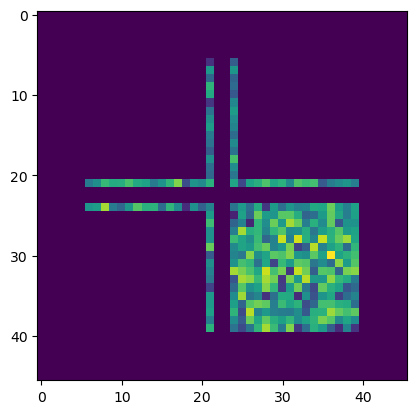

In [5]:
#Plot image from squeezed tensor reassembled_tensor[0,:,:]
plt.imshow(abs(reassembled_tensor[1,:,:]).squeeze().detach().numpy())

In [6]:
reassembled_tensor.shape, test_offset.shape

(torch.Size([2, 46, 46]), torch.Size([2, 4, 1, 2]))

In [7]:
test_channel_extract = hh.extract_channels_from_region(reassembled_tensor[:,None,:,:], test_offset)

tensor([[-0.0889, -0.0667, -0.0444, -0.0222,  0.0000,  0.0222,  0.0444,  0.0667,
          0.0889,  0.1111,  0.1333,  0.1556,  0.1778,  0.2000,  0.2222,  0.2444,
          0.2667,  0.2889,  0.3111,  0.3333,  0.3556,  0.3778,  0.4000,  0.4222,
          0.4444,  0.4667,  0.4889,  0.5111,  0.5333,  0.5556,  0.5778,  0.6000,
          0.6222,  0.6444,  0.6667,  0.6889,  0.7111,  0.7333,  0.7556,  0.7778,
          0.8000,  0.8222,  0.8444,  0.8667,  0.8889,  0.9111],
        [-0.0889, -0.0667, -0.0444, -0.0222,  0.0000,  0.0222,  0.0444,  0.0667,
          0.0889,  0.1111,  0.1333,  0.1556,  0.1778,  0.2000,  0.2222,  0.2444,
          0.2667,  0.2889,  0.3111,  0.3333,  0.3556,  0.3778,  0.4000,  0.4222,
          0.4444,  0.4667,  0.4889,  0.5111,  0.5333,  0.5556,  0.5778,  0.6000,
          0.6222,  0.6444,  0.6667,  0.6889,  0.7111,  0.7333,  0.7556,  0.7778,
          0.8000,  0.8222,  0.8444,  0.8667,  0.8889,  0.9111],
        [ 0.0889,  0.1111,  0.1333,  0.1556,  0.1778,  0.2000,

In [70]:
abs(test_channel_extract[1,0,-1,:5]), abs(reassembled_tensor[1,21,:10])

(tensor([0.3862, 0.7454, 0.6629, 0.4981, 0.5585]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2954, 0.7129, 0.4118,
         0.4443]))

In [79]:
test_offset[0,0][None,:,:].shape

torch.Size([1, 1, 2])

In [9]:
import torch.nn.functional as F

In [ ]:
img = torch.rand(1,16,16)

In [83]:
c, h, w = img.shape

x_s, y_s = (torch.arange(h) + 0)/(h-1), (torch.arange(w) + 0)/(w-1)

grid_shifted = torch.dstack(torch.meshgrid(x_s,y_s)) * 2 - 1

sampled = F.grid_sample(img[None], grid_shifted[None], align_corners = True)

In [84]:
sampled.shape

torch.Size([1, 1, 16, 16])

In [85]:
img[:,0,0], sampled[:,:,0,0]

(tensor([0.0103]), tensor([[0.0103]]))

In [56]:
def Translation(img, offset, jitter_amt):
    '''
    Translation function with custom complex number support.
    Uses torch.nn.functional.grid_sample to perform subpixel translation.
    Meant to be performed on a flattened set of inputs.

    Grid_sample takes an input of (N, C, H_in, W_in) and grid of (N, H_out, W_out, 2) to
    output (N, C, H_out, W_out). In our case, C is 1 because we already flattened the channels from (N, C, H_in, W_in)
    to (N * C, H_in, W_in). Offset is (N*C, 1, 2)

    We transform the input solution region to (N, 1, H, W), and the grid to (N, H_out, W_out, 2).
    The grid essentially contains all c possible translations of the input region.

    The output in our case will be (N, 1, H_out, W_out)

    Inputs
    ------
    img: torch.Tensor (N, H, W). Stack of images in a solution region. dtype complex, cfloat 
    offset: torch.Tensor (N, 1, 2). Offset of each image in the solution region

    Outputs
    ------
    out: torch.Tensor (N, 1, H_out, W_out)
    '''
    n, h, w = img.shape
    #Create 2d grid to sample bilinear interpolation from
    x, y = torch.arange(h), torch.arange(w)
    #Add offset to x, y using broadcasting (H) -> (C, H)
    jitter_x = torch.normal(torch.zeros(offset[:,:,0].shape), #offset: [n, 1]
                          std=jitter_amt)
    jitter_y = torch.normal(torch.zeros(offset[:,:,1].shape), #offset: [n, 1]
                          std=jitter_amt)
    
    x_shifted, y_shifted = (x + offset[:, :, 0] + jitter_x)/(h-1), \
                           (y + offset[:, :, 1] + jitter_y)/(w-1)
    
    #Create meshgrid using manual stacking method C x H x W x 2)
    #Multiply by 2 and subtract 1 to shift to [-1, 1] range for use by grid_sample
    grid = torch.stack([x_shifted.unsqueeze(-1).expand(n, -1, y_shifted.shape[1]),
                    y_shifted.unsqueeze(1).expand(n, x_shifted.shape[1], -1)],
                    dim = -1) * 2 - 1
    
    print(grid)

    #Apply F.grid_sample to translate real and imaginary parts separately.
    #grid_sample does not have native complex tensor support
    #Need to unsqueeze img to have it work with grid_sample (check documentation). 
    #In our case, color channels are 1 (singleton) and so we just unsqueeze at 2nd dimension

    translated_real = F.grid_sample(img.unsqueeze(1).real, grid,
                                    mode = 'bilinear', align_corners = True)
    if img.dtype == torch.complex64:
        translated_imag = F.grid_sample(img.unsqueeze(1).imag, grid,
                                        mode = 'bilinear', align_corners = True)
    else:
        translated_imag = torch.zeros_like(translated_real)

    #Combine real and imag
    translated = torch.view_as_complex(torch.stack((translated_real, translated_imag),
                                                   dim = -1))
    
    return translated

In [58]:
test_offset[1,1]

tensor([[-9,  9]])

In [61]:
#Testing translate out
test_translate = Translation(reassembled_tensor[1,:,:][None,:,:].real, torch.tensor([[-0,0]])[None,:,:], 0)

tensor([0.0000, 1.0000, 2.0000, 3.0000, 4.0000])


In [70]:
test_translate.shape

torch.Size([1, 1, 46, 46])

In [75]:
reassembled_tensor[1,21,7], test_translate[:,:,21,7]


(tensor(0.3230+0.5552j), tensor([[0.4525+0.j]]))

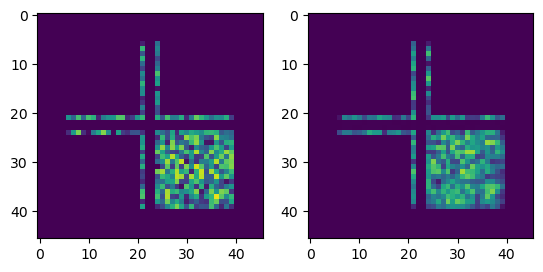

In [66]:
#Plot reassembled_tensor[0,:,:] and test_translate side by side

plt.subplot(1,2,1)
plt.imshow(reassembled_tensor[1,:,:].real.squeeze().detach().numpy())
#Use fixed clim
plt.clim(0,1)
plt.subplot(1,2,2)
#plt.imshow(reassembled_tensor[1,:,:].real.squeeze().detach().numpy())
plt.imshow(test_translate.real.squeeze())
plt.clim(0,1)


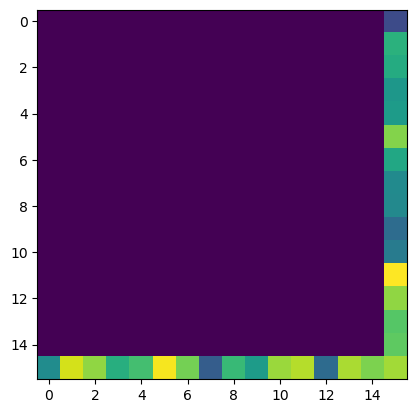

In [71]:
plt.imshow(abs(test_channel_extract[1,0,:,:]).squeeze().detach().numpy())